<a href="https://colab.research.google.com/github/therealmolf/gans-in-action/blob/master/ProGAN_using_TF_hub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


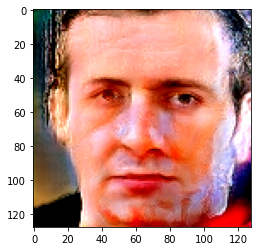

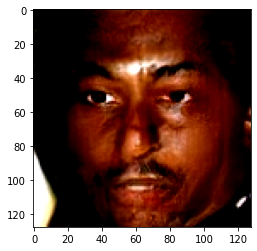

In [14]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

# TF1 stuff were moved to tf.compat.v1... i guess
# PRETRAINED ProGAN

# uniform interpolation between two points in latent space
def interpolate_points(p1, p2, n_steps=10):
	# interpolate ratios between the points
	ratios = np.linspace(0, 1, num=n_steps)
	# linear interpolate vectors
	vectors = list()
	for ratio in ratios:
		v = (1.0 - ratio) * p1 + ratio * p2
		vectors.append(v)
	return np.asarray(vectors)
 
# create a plot of generated images
def plot_generated(examples, n):
	# plot images
	for i in range(n):
		# define subplot
		pyplot.subplot(1, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :])
	pyplot.show()

with tf.Graph().as_default():
  module = hub.Module("https://tfhub.dev/google/progan-128/1")
  latent_dim = 512
  latent_vector = tf.random.normal([1, latent_dim], seed=1337)
  latent_vector_2 = tf.random.normal([1, latent_dim], seed=1335)
  interpolated_images = module(latent_vector)
  interpol = module(latent_vector_2)

  # interpolated =interpolate_points(latent_vector, latent_vector_2)
  # inter = module(interpolated)

  with tf.compat.v1.Session() as session:
    session.run(tf.compat.v1.global_variables_initializer())
    image_out = session.run(interpolated_images)
    image_out_2 = session.run(interpol)
    # listor = session.run(inter)

plt.imshow(image_out.reshape(128, 128, 3))
plt.show()
plt.imshow(image_out_2.reshape(128, 128, 3))
plt.show()